### All needed imports to run notebook

In [339]:
import tensorflow.compat.v2 as tf

import matplotlib.pyplot as plt
import numpy as np

tf.enable_v2_behavior()

### Load MNIST dataset

In [340]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
num_classes = 10
input_shape = (28,28)

### Visualize the data

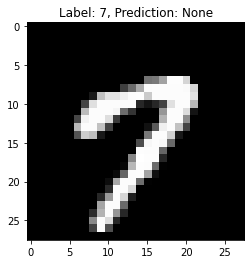

In [341]:
def show_img(x, y, prediction=None):
    plt.imshow(x, cmap='gray')
    plt.title(f"Label: {y}, Prediction: {prediction}")

idx = 15
show_img(x_train[idx], y_train[idx])

### Build training pipeline

In [342]:
# shuffle dataset
shuffler = np.random.permutation(len(x_train))
x_train = x_train[shuffler]
y_train = y_train[shuffler]

# normalize images
x_train = x_train / 255.

### Build evaluation pipeline

In [343]:
# shuffle dataset
shuffler = np.random.permutation(len(x_test))
x_test = x_test[shuffler]
y_test = y_test[shuffler]

# normalize images
x_test = x_test / 255.

### Create and train model (simple sequential)

In [344]:
# note, our objects are `one-hot` which means objects can belong to only one class
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_classes)
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [345]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [346]:
batch_size=128
epochs=15

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
)

Epoch 1/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3769 - sparse_categorical_accuracy: 0.8976 - val_loss: 0.2072 - val_sparse_categorical_accuracy: 0.9400
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.1774 - sparse_categorical_accuracy: 0.9488 - val_loss: 0.1483 - val_sparse_categorical_accuracy: 0.9572
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.1295 - sparse_categorical_accuracy: 0.9625 - val_loss: 0.1250 - val_sparse_categorical_accuracy: 0.9627
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0998 - sparse_categorical_accuracy: 0.9708 - val_loss: 0.1052 - val_sparse_categorical_accuracy: 0.9690
Epoch 5/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0824 - sparse_categorical_accuracy: 0.9755 - val_loss: 0.0942 - val_sparse_categorical_accuracy: 0.9700
Epoch 6/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0672 - sparse_categorica

In [347]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.0717068612575531
Test accuracy: 0.9794999957084656


### Make predictions

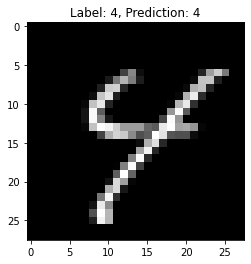

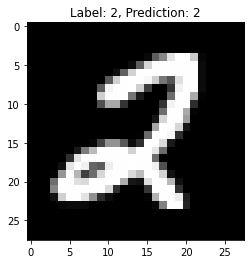

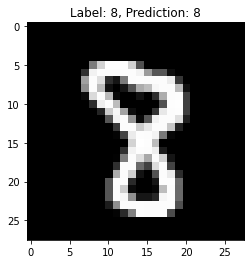

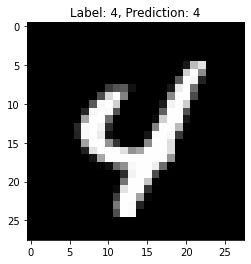

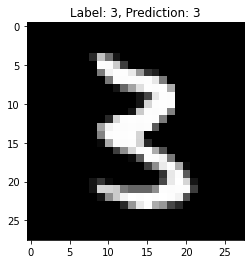

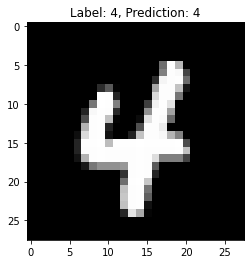

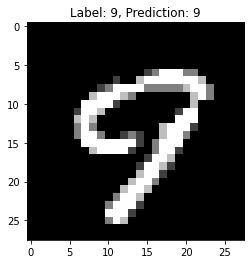

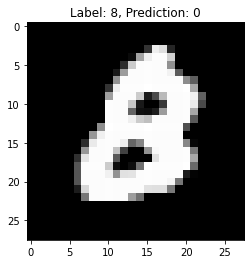

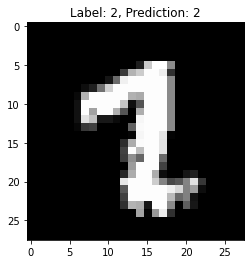

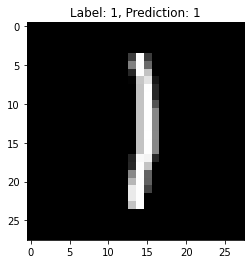

In [348]:
indices = [i for i, x in enumerate(x_test) if i % 1000 == 0]
x = x_test[indices]
y = y_test[indices]

predictions = model.predict(x)
predictions = np.argmax(predictions, axis=1)

for i, pred in enumerate(predictions):
    plt.figure()
    show_img(x[i],y[i],pred)
